In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from collections import Counter
from pylab import figure, show, legend, ylabel, xlabel
import matplotlib.patches as mpatches

In [2]:
missingValues = ["n/a", "na", " ", "__"]
data1 = pd.read_csv("/Users/aniketsingh/Desktop/SeniorProject/data/site_weather.csv",na_values = missingValues)
data2 = pd.read_csv("/Users/aniketsingh/Desktop/SeniorProject/data/ele.csv",na_values = missingValues)
data1.rename(columns = {'Unnamed: 0': 'Timestamp'}, inplace = True)
data1['Timestamp'] = pd.to_datetime(data1['Timestamp'])
#data1.set_index('Timestamp', inplace=True)
# data = data.reset_index(drop = True)
#First few rows
#########
data2.rename(columns = {'Unnamed: 0': 'Timestamp'}, inplace = True)
data2['Timestamp'] = pd.to_datetime(data2['Timestamp'])

In [3]:
#JOIN DATA
data = data1.merge(data2, on='Timestamp', how='left')

In [4]:
data

,Timestamp,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,relative_humidity_set_1,solar_radiation_set_1,mels_S,lig_S,lig_N,mels_N,hvac_N,hvac_S
0,2018-01-01 00:00:00+00:00,11.565,11.465,8.120,79.585,66.290,NaN,NaN,NaN,NaN,36.000000,22.500000
1,2018-01-01 00:30:00+00:00,11.515,11.460,8.160,80.060,36.525,NaN,NaN,NaN,NaN,37.700001,19.200001
2,2018-01-01 01:00:00+00:00,11.030,11.080,8.015,81.850,4.130,1.250000,0.200000,NaN,7.150000,37.450001,19.695000
3,2018-01-01 01:30:00+00:00,10.750,10.785,7.975,83.150,0.120,1.150000,0.200000,NaN,7.550000,37.600000,19.094999
4,2018-01-01 02:00:00+00:00,10.785,10.835,7.975,82.950,0.000,1.100000,0.200000,NaN,7.300000,37.300001,24.800000
...,...,...,...,...,...,...,...,...,...,...,...,...
35036,2019-12-31 22:00:00+00:00,16.090,14.280,4.780,47.320,408.200,1.795833,0.005556,NaN,8.585667,22.446974,23.104355
35037,2019-12-31 22:30:00+00:00,17.085,14.750,3.785,41.405,330.150,1.827083,0.000000,NaN,8.475536,23.469722,27.520789
35038,2019-12-31 23:00:00+00:00,17.885,15.150,2.845,36.820,282.100,1.754444,0.050000,NaN,8.572000,24.113158,25.355263
35039,2019-12-31 23:30:00+00:00,17.410,15.320,2.780,37.790,212.350,1.898889,0.386250,NaN,8.466270,24.302632,26.358289


In [5]:
data = data.drop(columns = ["dew_point_temperature_set_1d", "relative_humidity_set_1", "solar_radiation_set_1", "mels_S","lig_S","lig_N","mels_N"])


In [6]:
data['hvac'] = data['hvac_N'] + data['hvac_S']
data['temp'] = data['air_temp_set_1'] + data['air_temp_set_2']

In [7]:
data

,Timestamp,air_temp_set_1,air_temp_set_2,hvac_N,hvac_S,hvac,temp
0,2018-01-01 00:00:00+00:00,11.565,11.465,36.000000,22.500000,58.500000,23.030
1,2018-01-01 00:30:00+00:00,11.515,11.460,37.700001,19.200001,56.900002,22.975
2,2018-01-01 01:00:00+00:00,11.030,11.080,37.450001,19.695000,57.145000,22.110
3,2018-01-01 01:30:00+00:00,10.750,10.785,37.600000,19.094999,56.695000,21.535
4,2018-01-01 02:00:00+00:00,10.785,10.835,37.300001,24.800000,62.100001,21.620
...,...,...,...,...,...,...,...
35036,2019-12-31 22:00:00+00:00,16.090,14.280,22.446974,23.104355,45.551329,30.370
35037,2019-12-31 22:30:00+00:00,17.085,14.750,23.469722,27.520789,50.990512,31.835
35038,2019-12-31 23:00:00+00:00,17.885,15.150,24.113158,25.355263,49.468421,33.035
35039,2019-12-31 23:30:00+00:00,17.410,15.320,24.302632,26.358289,50.660921,32.730


In [8]:
data = data.drop(columns = ['air_temp_set_2','air_temp_set_1','hvac_S','hvac_N'])


In [9]:
data

,Timestamp,hvac,temp
0,2018-01-01 00:00:00+00:00,58.500000,23.030
1,2018-01-01 00:30:00+00:00,56.900002,22.975
2,2018-01-01 01:00:00+00:00,57.145000,22.110
3,2018-01-01 01:30:00+00:00,56.695000,21.535
4,2018-01-01 02:00:00+00:00,62.100001,21.620
...,...,...,...
35036,2019-12-31 22:00:00+00:00,45.551329,30.370
35037,2019-12-31 22:30:00+00:00,50.990512,31.835
35038,2019-12-31 23:00:00+00:00,49.468421,33.035
35039,2019-12-31 23:30:00+00:00,50.660921,32.730


In [10]:
print("-----------------Null Values-----------------")
print(data.isnull().sum())

-----------------Null Values-----------------
Timestamp       0
hvac         3726
temp          175
dtype: int64


In [11]:
data.fillna(data.mean(), inplace=True)
data['hvac'] = data['hvac'].fillna(data['hvac'].mean())
data['temp'] = data['temp'].fillna(data['temp'].median())


<ipython-input-11-77b25a2937fa>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.mean(), inplace=True)


In [12]:
print("-----------------Null Values-----------------")

print(data.isnull().sum())

-----------------Null Values-----------------
Timestamp    0
hvac         0
temp         0
dtype: int64


In [13]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Timestamp']

0       2018-01-01 00:00:00+00:00
1       2018-01-01 00:30:00+00:00
2       2018-01-01 01:00:00+00:00
3       2018-01-01 01:30:00+00:00
4       2018-01-01 02:00:00+00:00
                   ...           
35036   2019-12-31 22:00:00+00:00
35037   2019-12-31 22:30:00+00:00
35038   2019-12-31 23:00:00+00:00
35039   2019-12-31 23:30:00+00:00
35040   2020-01-01 00:00:00+00:00
Name: Timestamp, Length: 35041, dtype: datetime64[ns, UTC]

In [14]:
data['Timestamp'].dt

In [15]:
data['Timestamp'].dt.tz
data['Timestamp'] = data['Timestamp'].dt.tz_convert('US/Pacific')

In [16]:
#data['Timestamp'] = data.index
data['hours'] = pd.to_datetime(data['Timestamp']).dt.hour
data['day'] = pd.to_datetime(data['Timestamp']).dt.day
data['month'] = pd.to_datetime(data['Timestamp']).dt.month
data['minute'] = pd.to_datetime(data['Timestamp']).dt.minute
data['year'] = pd.to_datetime(data['Timestamp']).dt.year
data = data[data['minute']==30]

In [17]:
dataMeanForTemps = pd.DataFrame(data.groupby(by=['hours','day','year'])['temp','hvac'].mean())
dataMeanForTemps.reset_index(inplace=True)


<ipython-input-17-96c25ca21de5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataMeanForTemps = pd.DataFrame(data.groupby(by=['hours','day','year'])['temp','hvac'].mean())


In [18]:
dataFor2018 =  dataMeanForTemps[dataMeanForTemps['year'] == 2018]
dataFor2019 = dataMeanForTemps[dataMeanForTemps['year'] == 2019]


In [19]:
dataFor2019

,hours,day,year,temp,hvac
1,0,1,2019,23.864583,24.360520
3,0,2,2019,24.970417,21.344094
5,0,3,2019,24.355833,31.639658
7,0,4,2019,23.332500,30.402622
9,0,5,2019,24.431250,32.245236
...,...,...,...,...,...
1486,23,27,2019,24.594167,28.561602
1488,23,28,2019,22.366250,29.414618
1490,23,29,2019,21.824091,19.896150
1492,23,30,2019,24.600455,26.229941


In [20]:
dataFor2018 = dataFor2018.drop(columns = ['day','year'])
dataFor2019 = dataFor2019.drop(columns = ['day','year'])

In [21]:
dataFor2019.describe

<bound method NDFrame.describe of       hours       temp       hvac
1         0  23.864583  24.360520
3         0  24.970417  21.344094
5         0  24.355833  31.639658
7         0  23.332500  30.402622
9         0  24.431250  32.245236
...     ...        ...        ...
1486     23  24.594167  28.561602
1488     23  22.366250  29.414618
1490     23  21.824091  19.896150
1492     23  24.600455  26.229941
1495     23  29.030000  31.413524

[744 rows x 3 columns]>

In [22]:
#dataFor2019.set_index('hours', inplace=True)

In [23]:
dataFor2019.columns

Index(['hours', 'temp', 'hvac'], dtype='object')

In [24]:
dataFor2019.dtypes


hours      int64
temp     float64
hvac     float64
dtype: object

In [25]:
dataFor2019


,hours,temp,hvac
1,0,23.864583,24.360520
3,0,24.970417,21.344094
5,0,24.355833,31.639658
7,0,23.332500,30.402622
9,0,24.431250,32.245236
...,...,...,...
1486,23,24.594167,28.561602
1488,23,22.366250,29.414618
1490,23,21.824091,19.896150
1492,23,24.600455,26.229941


In [26]:
X = dataFor2019[['temp','hvac']]

In [27]:
X

,temp,hvac
1,23.864583,24.360520
3,24.970417,21.344094
5,24.355833,31.639658
7,23.332500,30.402622
9,24.431250,32.245236
...,...,...
1486,24.594167,28.561602
1488,22.366250,29.414618
1490,21.824091,19.896150
1492,24.600455,26.229941


In [28]:
y = dataFor2019[['hours']]

In [29]:
y

,hours
1,0
3,0
5,0
7,0
9,0
...,...
1486,23
1488,23
1490,23
1492,23


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
X_train

,temp,hvac
1007,32.327500,36.962355
195,23.893333,33.270984
1029,30.256250,33.641388
1460,25.217917,28.090684
1037,34.433644,46.522159
...,...,...
1421,23.900000,26.877923
385,22.262917,21.895982
1263,29.412500,40.694652
1121,30.173750,33.989116


In [32]:
y_train

,hours
1007,16
195,3
1029,16
1460,23
1037,16
...,...
1421,22
385,6
1263,20
1121,18


ValueError: x and y must be the same size

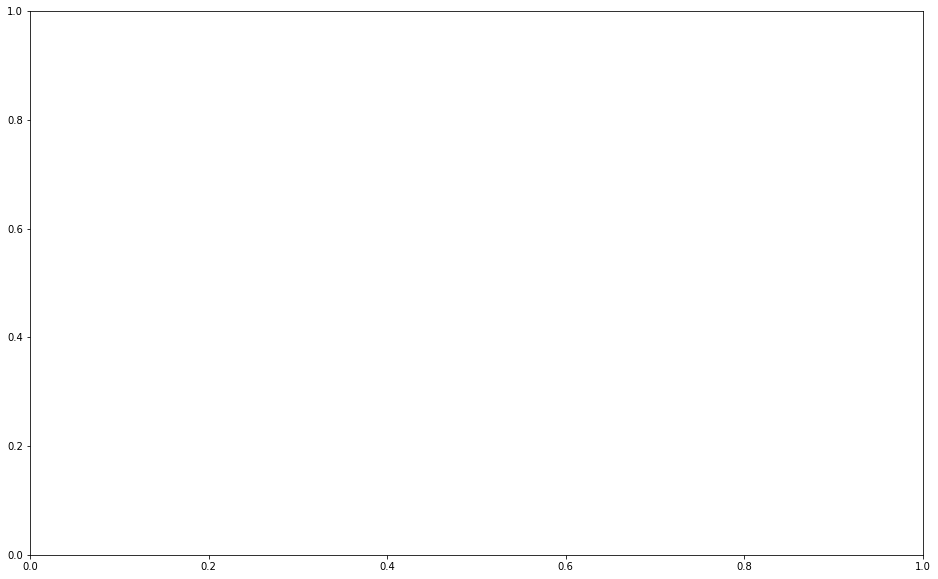

In [33]:
plt.rcParams["figure.figsize"] = (16,10)
plt.scatter(x=X_train,y=y_train, label = 'Training Data', color = 'r', alpha = .7)
#plt.scatter(X_test, y_test, label = 'Testing Data', color = 'g', alpha = .7)
plt.legend()
plt.title("Training and Testing Scatter for 2019 ")
plt.show()


In [34]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
print(regressor.intercept_)


[-7.45913103]


In [36]:
print(regressor.coef_)


[[0.63947812 0.03155878]]


In [37]:
y_pred = regressor.predict(X_test)


In [45]:
len(y_test)

149

In [44]:
len(y_pred)

149

In [ ]:
len(X_train)

In [52]:
y_pred

array([[ 9.60451545],
       [14.72012511],
       [ 9.4045221 ],
       [ 8.34134773],
       [ 7.80249699],
       [ 8.88615197],
       [14.84105726],
       [10.22621513],
       [ 8.72709086],
       [ 9.08065162],
       [11.02211848],
       [13.40035099],
       [13.86456822],
       [ 7.77715688],
       [ 9.17758   ],
       [ 8.66626113],
       [13.77867864],
       [16.27462097],
       [14.83491888],
       [ 7.73132084],
       [14.00020689],
       [ 9.4841447 ],
       [10.6573056 ],
       [16.29670478],
       [10.85451213],
       [ 8.32078273],
       [ 8.39644782],
       [12.07637313],
       [13.06347205],
       [12.96444099],
       [ 9.05658213],
       [ 8.38144745],
       [19.35058004],
       [13.32013313],
       [ 8.97625751],
       [11.95316829],
       [11.7523971 ],
       [13.75280219],
       [11.32018116],
       [13.95567435],
       [10.94217838],
       [ 9.1048079 ],
       [ 9.18484597],
       [ 9.18249773],
       [13.26465717],
       [10

In [49]:
X_train

,temp,hvac
1007,32.327500,36.962355
195,23.893333,33.270984
1029,30.256250,33.641388
1460,25.217917,28.090684
1037,34.433644,46.522159
...,...,...
1421,23.900000,26.877923
385,22.262917,21.895982
1263,29.412500,40.694652
1121,30.173750,33.989116


In [46]:
dataFor2019 = pd.DataFrame(columns = {'Actual': y_test, 'Predicted': y_pred})
dataFor2019

,Actual,Predicted


In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.970532422036127
Mean Squared Error: 40.512784864991346
Root Mean Squared Error: 6.364965425278549


ValueError: x and y must be the same size

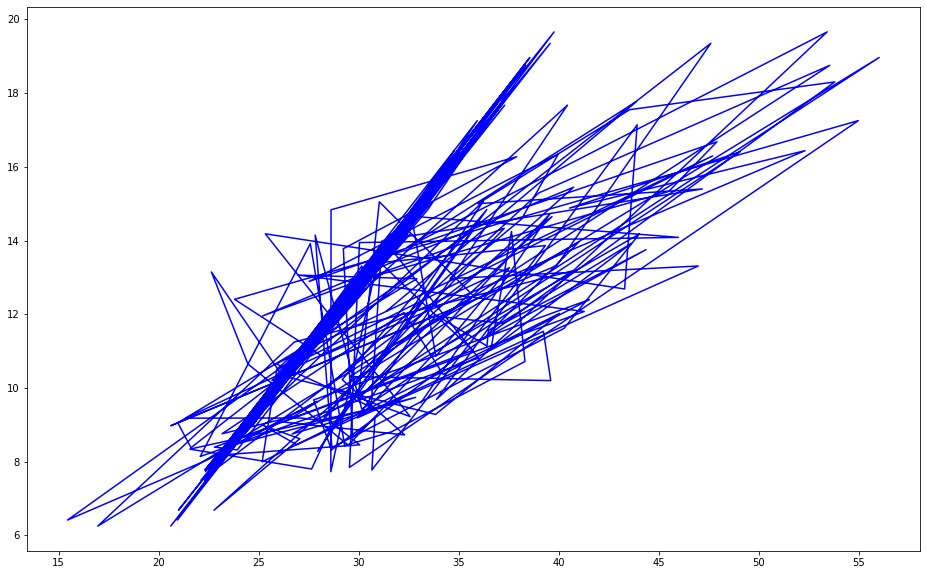

In [40]:
plt.plot(X_test, y_pred, label = "Linear Regression", color = 'b')
plt.scatter(X_test,y_test,label ="Actual Test Data", color ='g', alpha = .7)
plt.title("Linear Regression Model on 2019 Data")
plt.legend()
plt.show()
